In [94]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [95]:
data = load_iris()
x = data.data
y = data.target

In [96]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [97]:
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1,1))

In [98]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_one_hot, test_size=0.2,random_state=42)

In [99]:
model = Sequential()
model.add(Dense(10, input_shape =(x_train.shape[1],),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

c:\Users\STUDENT\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.compile(optimizer='adam',loss ='categorical_crossentropy',metrics=['accuracy'])

In [101]:
history = model.fit(x_train,y_train,epochs=100, batch_size=32,validation_split=0.2, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.4622 - loss: 0.9787 - val_accuracy: 0.2500 - val_loss: 1.0386
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4766 - loss: 0.9753 - val_accuracy: 0.3750 - val_loss: 1.0256
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4792 - loss: 0.9746 - val_accuracy: 0.4167 - val_loss: 1.0128
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5547 - loss: 0.9410 - val_accuracy: 0.5000 - val_loss: 0.9997
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5508 - loss: 0.9213 - val_accuracy: 0.5417 - val_loss: 0.9865
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5716 - loss: 0.9220 - val_accuracy: 0.5833 - val_loss: 0.9706
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6159 - loss: 0.8952 - val_accuracy: 0.6250 - val_loss: 0.9526
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6354 - loss: 0.8630 - val_accuracy: 0.7083 - val_loss: 0.931

In [102]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9333 - loss: 0.2481


In [103]:
predict = model.predict(x_test)
print("Predictions:",np.argmax(predict, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predictions: [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


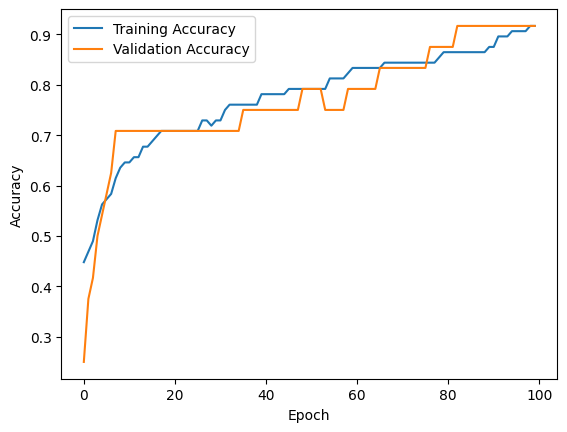

In [104]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()